In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importig a CSV File

In [3]:
df = pd.read_csv("Customers.csv")
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Purchase Category,Subcategory,Discount Availed,Discount Name,Discount Amount,Gross Amount,Net Amount,Purchase Method,Location
0,CG-2160,a4e3f58d-3bc2-45a2-b6f8-7b2e3509a206,Female,18-35,26-07-2024,Sports & Fitness,Fitness Tracker,Yes,Festival25,655.3925,2621.57,1966.1775,Google Pay UPI,Hyderabad
1,CG-3832,952e1242-5196-4073-91a3-0dd6d31edd3e,Male,18-35,07-08-2024,Clothing,Women,No,NaN,0.0000,2103.01,2103.0100,Credit Card,Pune
2,CG-1267,b9fb2808-3358-42bd-b71d-ae11f1600930,Other,50 and above,18-04-2024,Electronic,Headphones,Yes,SeasonalOffer21,1154.6871,5498.51,4343.8229,Cash on Delivery,Pune
3,CG-5915,31b86289-baa7-4c1a-bc8f-ef65386ca1f5,Male,18-35,01-06-2024,Sports & Fitness,Sportswear,No,NaN,0.0000,5609.11,5609.1100,Credit Card,Jaipur
4,CG-8943,b513cef6-85da-47bb-a656-ab0dea5f1ef9,Male,18-35,25-07-2024,Sports & Fitness,Fitness Tracker,No,NaN,0.0000,1441.78,1441.7800,Credit Card,Pune


## Dataset Overview: Shape, Info and Duplicate Records

In [4]:
print(df.shape)
print(df["TID"].duplicated().sum())
df.info()

(25000, 14)
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CID                25000 non-null  object 
 1   TID                25000 non-null  object 
 2   Gender             25000 non-null  object 
 3   Age Group          25000 non-null  object 
 4   Purchase Date      25000 non-null  object 
 5   Purchase Category  25000 non-null  object 
 6   Subcategory        25000 non-null  object 
 7   Discount Availed   25000 non-null  object 
 8   Discount Name      10124 non-null  object 
 9   Discount Amount    25000 non-null  float64
 10  Gross Amount       25000 non-null  float64
 11  Net Amount         24950 non-null  float64
 12  Purchase Method    25000 non-null  object 
 13  Location           25000 non-null  object 
dtypes: float64(3), object(11)
memory usage: 2.7+ MB


## Null Handing And Converting "Net Amount" Column to Numeric

In [5]:
df["Net Amount"] = pd.to_numeric(df["Net Amount"],errors = "coerce")
df.loc[((df["Discount Availed"] == "No") & (df["Gross Amount"] == df["Net Amount"])),"Discount Amount"] = 0
df.loc[df["Discount Availed"] == "No","Discount Name"] = "No Discount"
df.loc[df["Net Amount"].isna(),"Net Amount"] = df["Gross Amount"] - df["Discount Amount"]

## Identifying Null Values

In [6]:
print(df.isnull().sum())
df.describe()

CID                  0
TID                  0
Gender               0
Age Group            0
Purchase Date        0
Purchase Category    0
Subcategory          0
Discount Availed     0
Discount Name        0
Discount Amount      0
Gross Amount         0
Net Amount           0
Purchase Method      0
Location             0
dtype: int64


,Discount Amount,Gross Amount,Net Amount
count,25000.000000,25000.000000,25000.000000
mean,366.922856,5058.337315,4691.414459
std,650.499910,2855.553909,2720.683711
min,0.000000,100.080000,72.156000
25%,0.000000,2605.635000,2370.552500
50%,0.000000,5048.575000,4620.780000
75%,454.559625,7551.112500,6891.680000
max,2999.286000,9999.720000,9998.920000


In [7]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Day of Week"] = df["Purchase Date"].dt.strftime('%a')
df["Month"] = df["Purchase Date"].dt.strftime('%b')
df["Year"] = df["Purchase Date"].dt.year
print(df["Year"].unique())
df.head(2)

C:\Users\nirma\AppData\Local\Temp\ipykernel_2608\3337873540.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])


[2024]


,CID,TID,Gender,Age Group,Purchase Date,Purchase Category,Subcategory,Discount Availed,Discount Name,Discount Amount,Gross Amount,Net Amount,Purchase Method,Location,Day of Week,Month,Year
0,CG-2160,a4e3f58d-3bc2-45a2-b6f8-7b2e3509a206,Female,18-35,2024-07-26,Sports & Fitness,Fitness Tracker,Yes,Festival25,655.3925,2621.57,1966.1775,Google Pay UPI,Hyderabad,Fri,Jul,2024
1,CG-3832,952e1242-5196-4073-91a3-0dd6d31edd3e,Male,18-35,2024-08-07,Clothing,Women,No,No Discount,0.0000,2103.01,2103.0100,Credit Card,Pune,Wed,Aug,2024


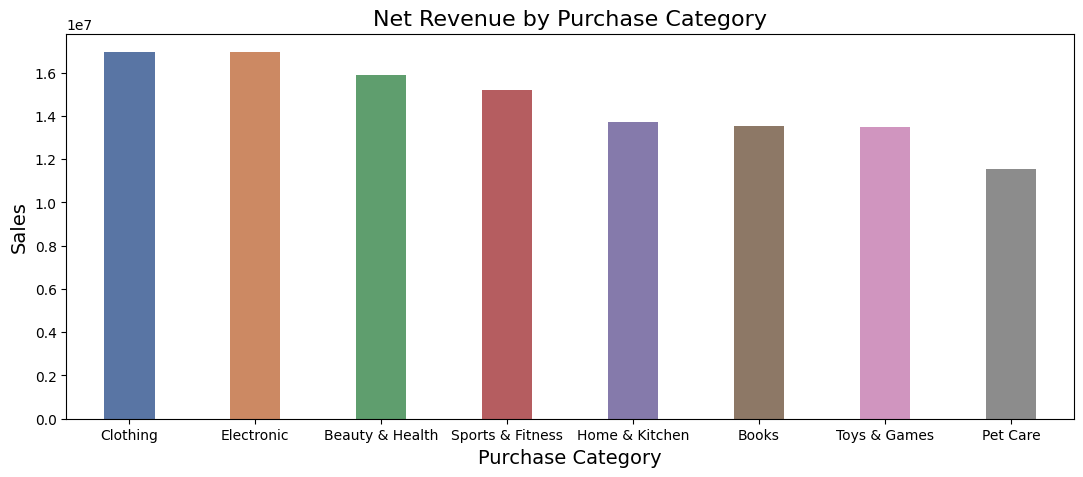

In [43]:
Top_Category = df.groupby("Purchase Category").agg({"Net Amount":"sum"}).round(2).sort_values(by =
               "Net Amount",ascending = False).reset_index()
plt.figure(figsize = (13,5))
sns.barplot(Top_Category,x = "Purchase Category",y = "Net Amount",hue = "Purchase Category",palette = "deep",width = 0.4)
plt.title("Net Revenue by Purchase Category",fontsize = 16)
plt.xlabel("Purchase Category",fontsize = 14)
plt.ylabel("Sales",fontsize = 14)
plt.show()

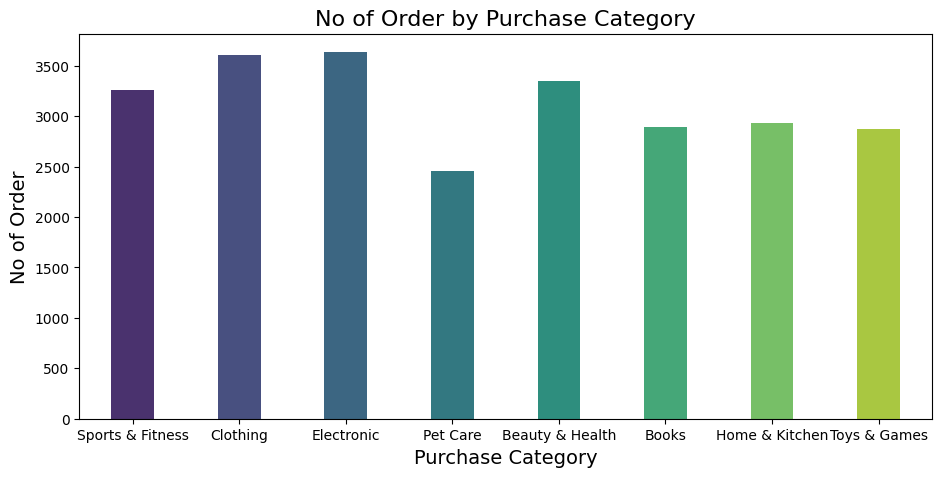

In [9]:
plt.figure(figsize = (11,5))
sns.countplot(df,x = "Purchase Category",hue = "Purchase Category",palette = "viridis",width = 0.4)
plt.title("No of Order by Purchase Category",fontsize = 16)
plt.xlabel("Purchase Category",fontsize = 14)
plt.ylabel("No of Order",fontsize = 14)
plt.show()

## 📊Top Subcategory by Net Revenue for Each Category

In [10]:
sb = df.groupby(["Purchase Category","Subcategory"]).agg({"Net Amount":"sum"}).round(2).sort_values(
       ["Purchase Category","Net Amount"],ascending = [True,False])
sb = sb.reset_index()
sb = sb.groupby("Purchase Category").head(1)
sb = sb.groupby(["Purchase Category","Subcategory"]).agg({"Net Amount":"sum"}).sort_values(
        ["Purchase Category","Net Amount"],ascending = [True,False])
sb.rename(columns = {"Net Amount":"Net Revenue"},inplace = True)
sb.reset_index()

,Purchase Category,Subcategory,Net Revenue
0,Beauty & Health,Skincare,5648029.89
1,Books,Fiction,4578755.71
2,Clothing,Kids,4415050.23
3,Electronic,Headphones,4299035.88
4,Home & Kitchen,Cookware,4775630.98
5,Pet Care,Toys,4098766.66
6,Sports & Fitness,Fitness Tracker,5373272.43
7,Toys & Games,Educational Toys,4622619.30


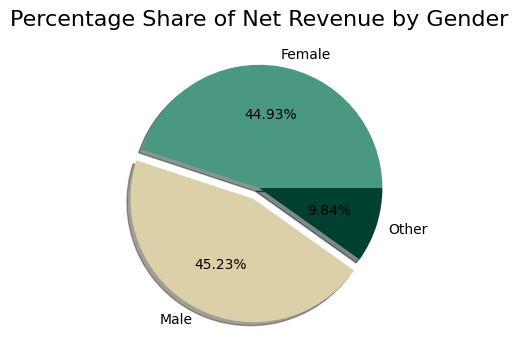

In [11]:
gn = df.groupby("Gender")["Net Amount"].sum().reset_index()
ex = [0,0.1,0]
plt.figure(figsize = (8,4))
plt.pie(x = gn["Net Amount"], labels = gn["Gender"],explode = ex, colors = ["#4A9782","#DCD0A8","#004030"],shadow = True,autopct = "%1.2f%%",
       startangle = 0)
plt.title("Percentage Share of Net Revenue by Gender",fontsize = 16)
plt.show()

## 📊Top 3 Revenue-Generating Categories for Each Gender

In [12]:
Top_Category = df.groupby(["Gender","Purchase Category"]).agg({"Net Amount":"sum"}).round(2).sort_values(by = ["Gender","Net Amount"],
                ascending = [True,False])
Top_Category = Top_Category.groupby("Gender").head(3)
Top_Category

Net Amount
Gender Purchase Category            
Female Clothing           9402668.40
       Beauty & Health    8588624.79
       Sports & Fitness   6097778.51
Male   Electronic         9959647.19
       Sports & Fitness   7688075.00
       Books              6644058.54
Other  Clothing           1595117.20
       Electronic         1538448.19
       Beauty & Health    1507040.46

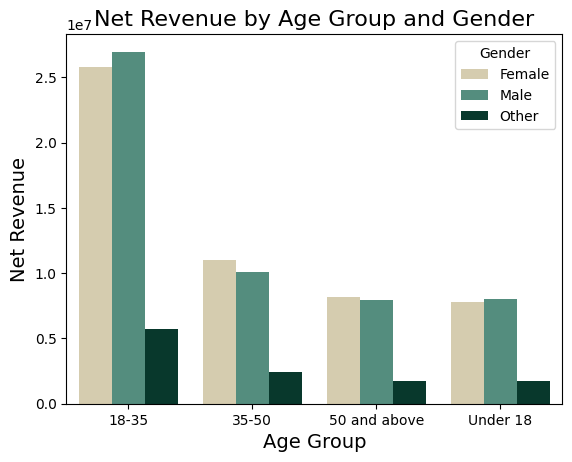

In [13]:
age = df.groupby(["Age Group","Gender"]).agg({"Net Amount":"sum"}).reset_index()
sns.barplot(age,x = "Age Group",y = "Net Amount",hue = "Gender",palette = ["#DCD0A8","#4A9782","#004030"])
plt.title("Net Revenue by Age Group and Gender",fontsize = 16)
plt.xlabel("Age Group",fontsize = 14)
plt.ylabel("Net Revenue",fontsize = 14)
plt.show()

## 📊Top 3 Categories by Net Revenue for Each Age Group

In [14]:
gp = df.groupby(["Age Group","Purchase Category"]).agg({"Net Amount":"sum"}).round(2).sort_values(by = ["Age Group","Net Amount"],
     ascending = [True,False])
gp = gp.groupby("Age Group").head(3)
gp

Net Amount
Age Group    Purchase Category            
18-35        Clothing           9625459.25
             Electronic         9444397.59
             Sports & Fitness   9275441.85
35-50        Home & Kitchen     5126102.87
             Clothing           3399355.94
             Books              3300197.45
50 and above Books              3582111.51
             Sports & Fitness   2210878.07
             Beauty & Health    2195845.27
Under 18     Toys & Games       4511472.22
             Books              2968246.27
             Electronic         2669650.18

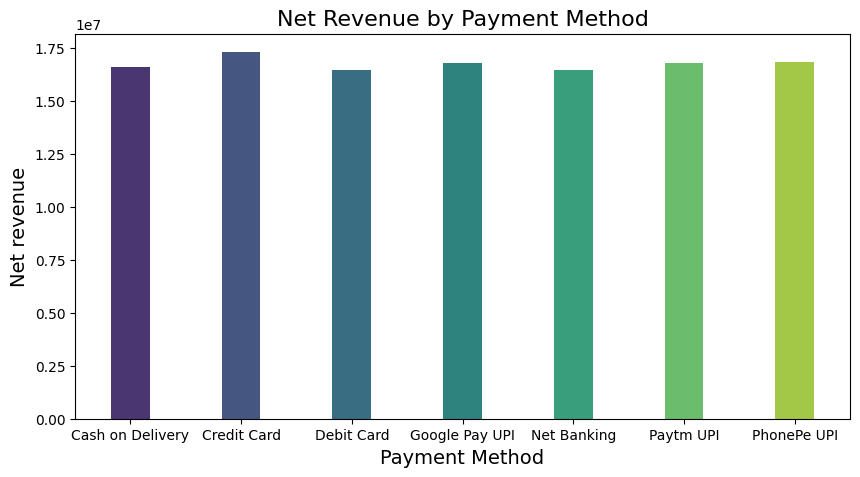

In [15]:
Method = df.groupby("Purchase Method").agg({"Net Amount":"sum"}).round(2).reset_index()
plt.figure(figsize = (10,5))
sns.barplot(Method,x = "Purchase Method",y = "Net Amount",hue = "Purchase Method",palette = "viridis",width = 0.35)
plt.title("Net Revenue by Payment Method",fontsize = 16)
plt.xlabel("Payment Method",fontsize = 14)
plt.ylabel("Net revenue",fontsize = 14)
plt.show()

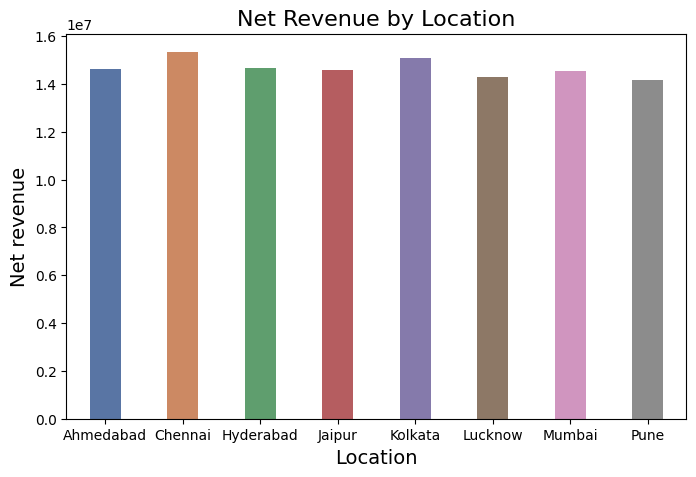

In [16]:
location = df.groupby(["Location"]).agg({"Net Amount":"sum","TID":"count"}).round(2)
plt.figure(figsize = (8,5))
sns.barplot(location,x = "Location",y = "Net Amount",hue = "Location",palette = "deep",width = 0.4)
plt.title("Net Revenue by Location",fontsize = 16)
plt.xlabel("Location",fontsize = 14)
plt.ylabel("Net revenue",fontsize = 14)
plt.show()

## Top and Bottom Purchase Categories by Location (Basis on Net Revenue)

In [45]:
loc = df.groupby(["Location","Purchase Category"]).agg({"Net Amount":"sum"}).round(2).sort_values(by = ["Location",
                "Net Amount"],ascending = [True,False])
loc = loc.reset_index()
Top = loc.groupby("Location").head(1)
Bottom = loc.groupby("Location").tail(1)
loc = pd.concat([Top, Bottom])
loc = loc.groupby(["Location","Purchase Category"]).agg({"Net Amount":"sum"}).sort_values(by = ["Location","Net Amount"],ascending = [True,False])
loc

Net Amount
Location  Purchase Category            
Ahmedabad Beauty & Health    2165704.36
          Books              1543399.65
Chennai   Electronic         2317215.08
          Pet Care           1468838.17
Hyderabad Clothing           2286870.29
          Pet Care           1401829.19
Jaipur    Clothing           2214067.53
          Home & Kitchen     1486581.34
Kolkata   Electronic         2291190.77
          Pet Care           1560705.25
Lucknow   Beauty & Health    2127263.01
          Pet Care           1352877.66
Mumbai    Sports & Fitness   2075123.60
          Pet Care           1269050.02
Pune      Electronic         2072863.09
          Pet Care           1316253.26

## Top 10 High-Spending Repeat Customers

In [18]:
repeat = df.groupby(["CID"]).agg({"TID":"count","Net Amount":"sum"}).sort_values("Net Amount",ascending = False)
repeat.head(10)

,TID,Net Amount
CID,,
CG-9999,14,97885.0296
CG-9731,15,92938.2575
CG-3648,14,87925.4291
CG-8605,17,87473.4065
CG-4062,14,85876.0702
CG-2758,12,84942.4975
CG-6662,14,83277.1960
CG-8206,17,82434.1190
CG-2406,14,80013.4638


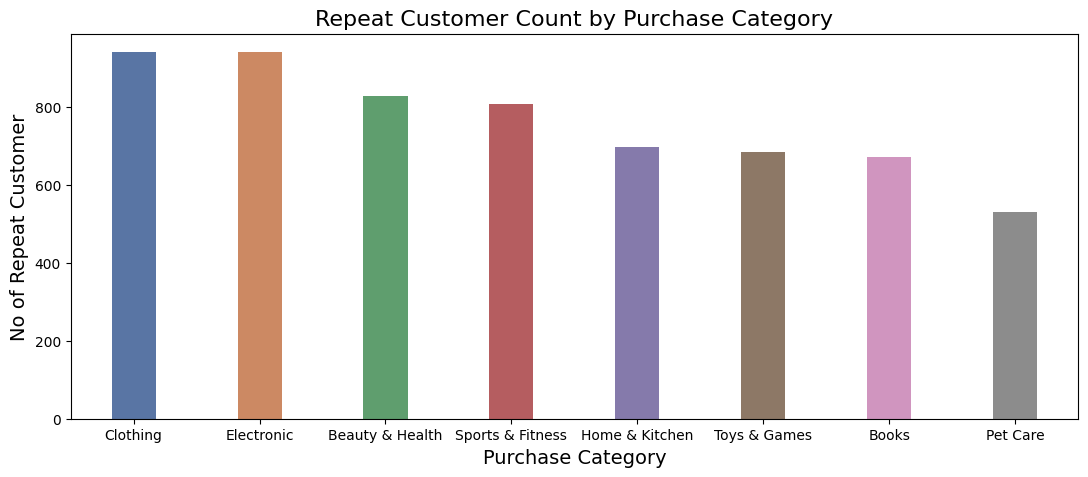

In [19]:
gp = df.groupby(["CID", "Purchase Category"]).agg({"TID": "count"}).reset_index()
gp = gp[gp["TID"] > 1]
gp = gp.groupby("Purchase Category").agg({"CID":"nunique"}).sort_values("CID", ascending=False)
gp = gp.rename(columns={"CID": "Repeat Customer Count"}).reset_index()
plt.figure(figsize = (13,5))
sns.barplot(gp,x = "Purchase Category",y = "Repeat Customer Count",hue = "Purchase Category",palette = "deep",width = 0.35)
plt.title("Repeat Customer Count by Purchase Category",fontsize = 16)
plt.xlabel("Purchase Category",fontsize = 14)
plt.ylabel("No of Repeat Customer",fontsize = 14)
plt.show()

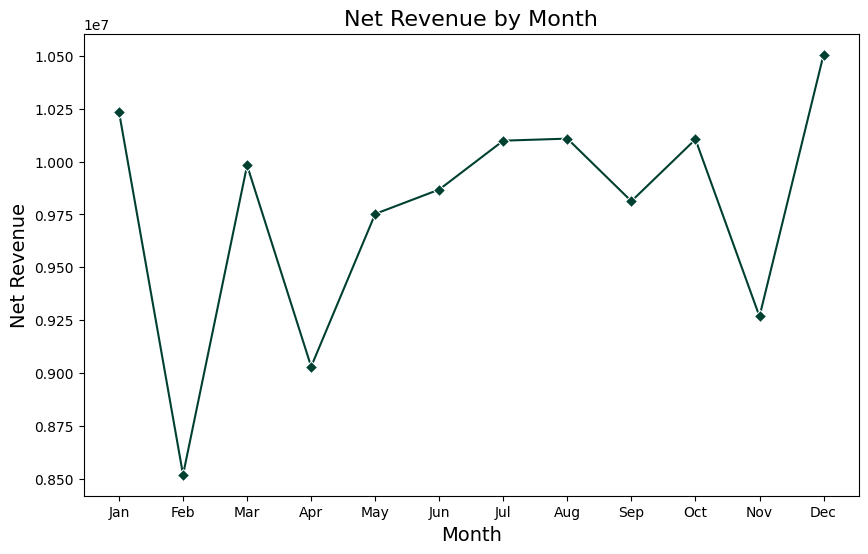

In [20]:
gp = df.groupby("Month").agg({"Net Amount":"sum"}).round(2)
gp = gp.reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
gp['Month'] = pd.Categorical(gp['Month'], categories=month_order, ordered=True)
gp = gp.sort_values('Month')
plt.figure(figsize = (10,6))
sns.lineplot(gp,x = "Month",y = "Net Amount",marker = "D",color = "#004030")
plt.title("Net Revenue by Month",fontsize = 16)
plt.xlabel("Month",fontsize = 14)
plt.ylabel("Net Revenue",fontsize = 14)
plt.show()

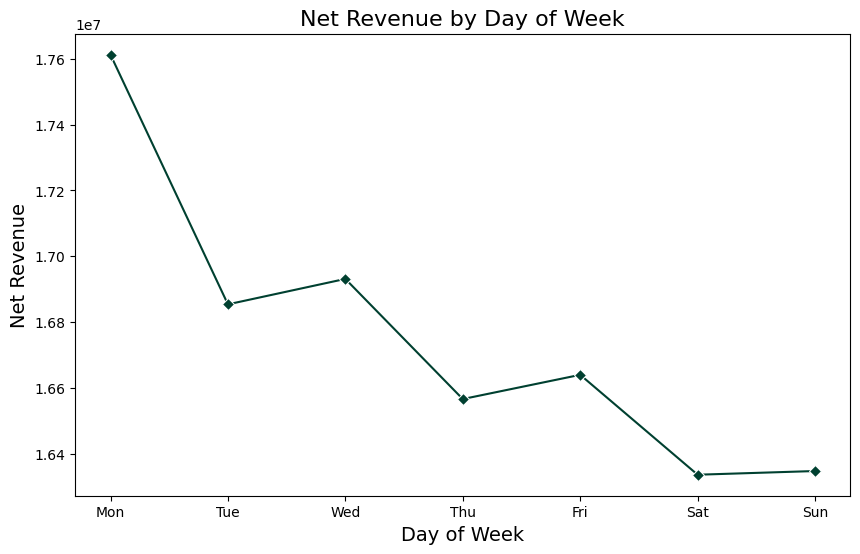

In [21]:
gp = df.groupby("Day of Week").agg({"Net Amount":"sum"}).round(2)
gp = gp.reset_index()
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
gp['Day of Week'] = pd.Categorical(gp['Day of Week'], categories = day_order, ordered=True)
gp = gp.sort_values('Day of Week')
plt.figure(figsize = (10,6))
sns.lineplot(gp,x = "Day of Week",y = "Net Amount",marker = "D",color = "#004030")
plt.title("Net Revenue by Day of Week",fontsize = 16)
plt.xlabel("Day of Week",fontsize = 14)
plt.ylabel("Net Revenue",fontsize = 14)
plt.show()

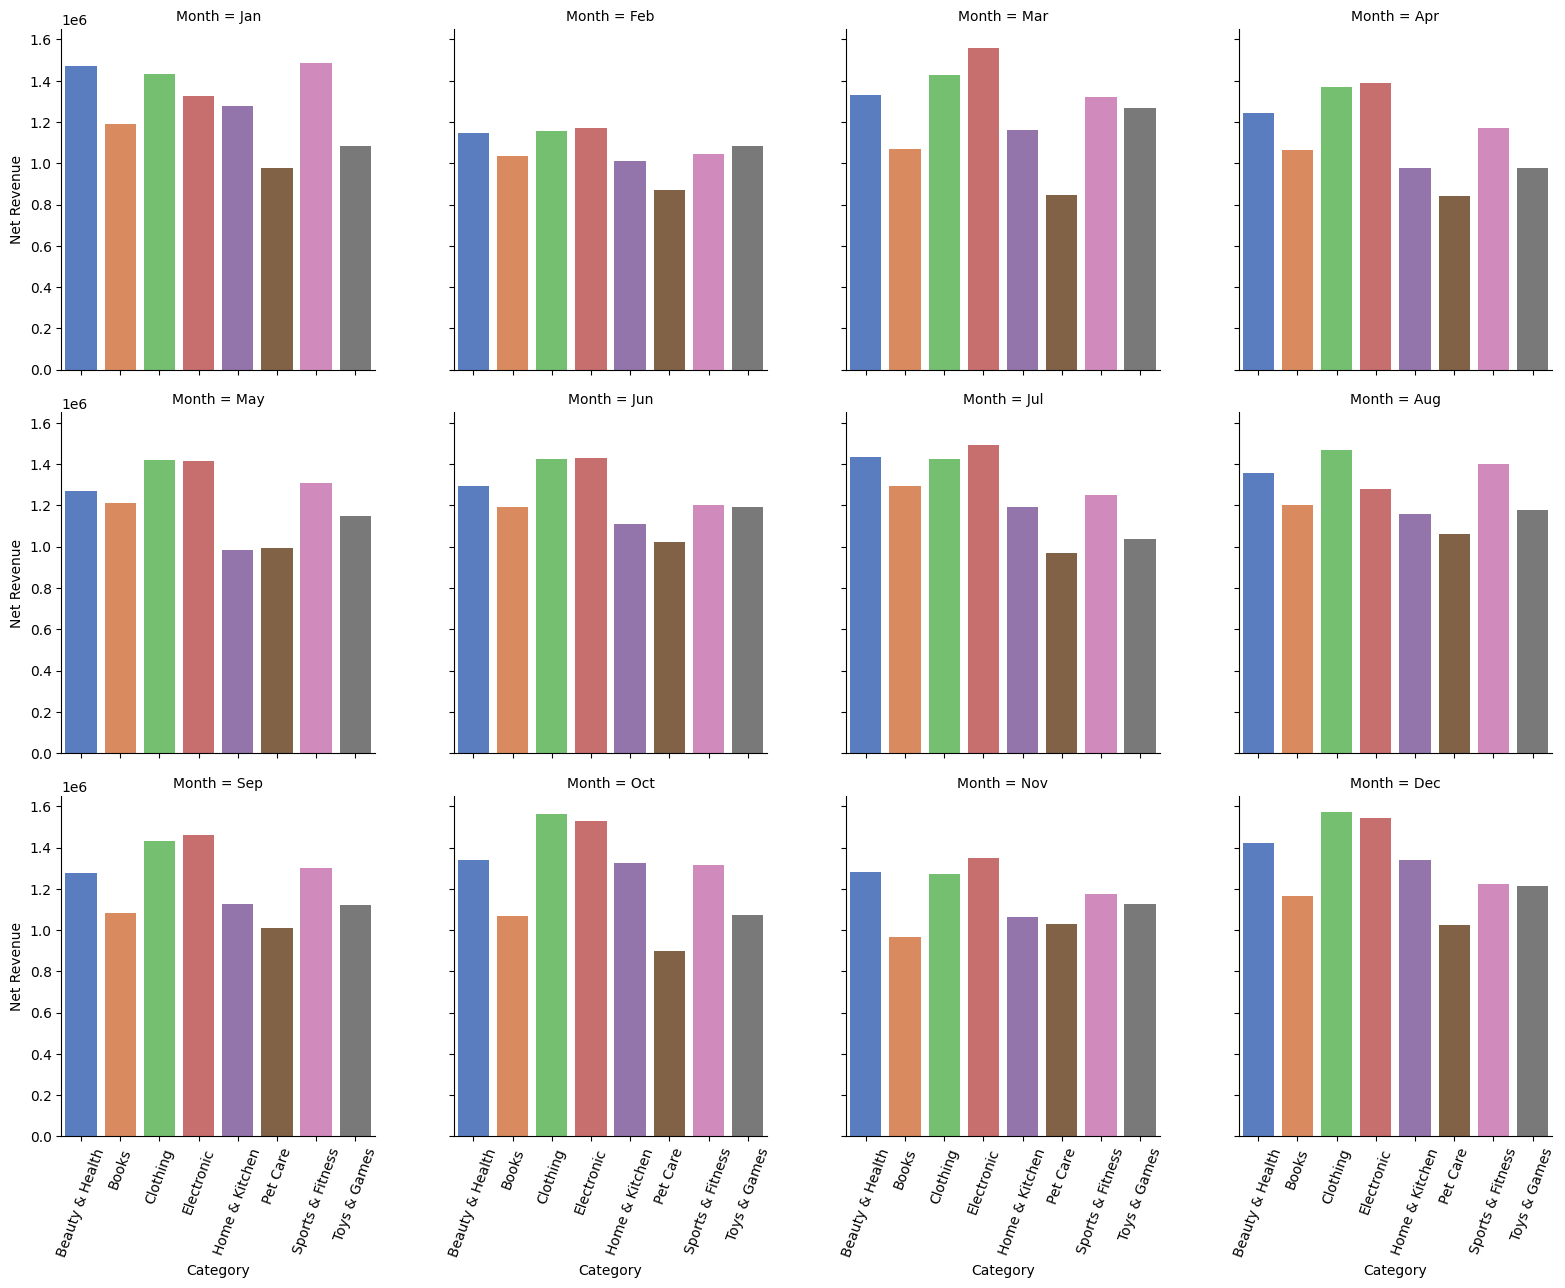

In [22]:
gp = df.groupby(["Month","Purchase Category"]).agg({"Net Amount":"sum"}).round(2)
gp = gp.reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
a = sns.FacetGrid(gp,col = "Month",col_order = month_order,col_wrap = 4,height = 4)
a.map_dataframe(sns.barplot,x = "Purchase Category",y = "Net Amount",hue = "Purchase Category",palette = "muted")

a.set_axis_labels("Category", "Net Revenue")
for ax in a.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(70)
plt.show()

## 📊 Top Purchase Category by Net Revenue for Each Month

In [23]:
gp = df.groupby(["Month","Purchase Category"]).agg({"Net Amount":"sum"}).round(2).sort_values(by = ["Month","Net Amount"],
                ascending = [True,False])
gp = gp.groupby("Month").head(1)
gp = gp.reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
gp['Month'] = pd.Categorical(gp['Month'], categories=month_order, ordered=True)
gp.sort_values("Month",inplace = True)
gp = gp.reset_index()
gp.drop(gp.columns[[0]],axis = 1,inplace = True)
gp

,Month,Purchase Category,Net Amount
0,Jan,Sports & Fitness,1484341.87
1,Feb,Electronic,1168978.44
2,Mar,Electronic,1559529.49
3,Apr,Electronic,1388738.64
4,May,Clothing,1418857.72
5,Jun,Electronic,1428509.17
6,Jul,Electronic,1494457.53
7,Aug,Clothing,1467756.60
8,Sep,Electronic,1459931.91
9,Oct,Clothing,1560844.07


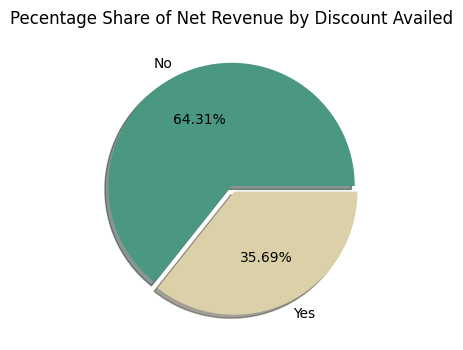

In [24]:
dc = df.groupby("Discount Availed").agg({"Net Amount":"sum"}).reset_index()
ex = [0,0.05]
plt.figure(figsize = (5,4))
plt.pie(dc["Net Amount"],labels = dc["Discount Availed"],explode = ex,colors = ["#4A9782","#DCD0A8"],shadow = True,autopct = "%1.2f%%",startangle = 0)
plt.title("Pecentage Share of Net Revenue by Discount Availed")
plt.show()

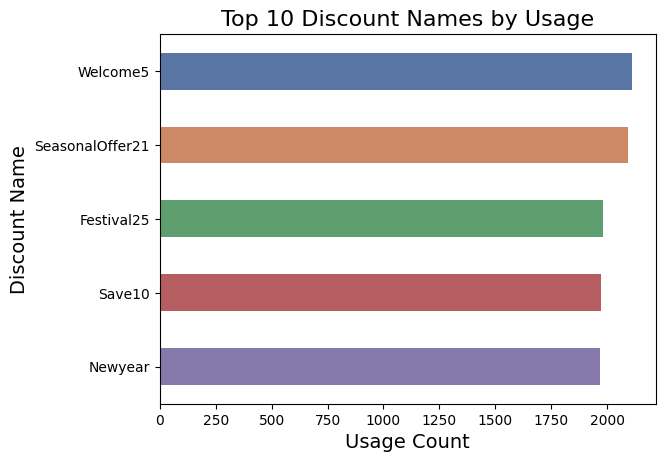

In [42]:
top_discounts = df[df["Discount Availed"] == "Yes"]["Discount Name"].value_counts().reset_index()
sns.barplot(top_discounts,x = "count",y = "Discount Name",hue = "Discount Name",palette = "deep",width = 0.5)
plt.title("Top 10 Discount Names by Usage",fontsize = 16)
plt.xlabel("Usage Count",fontsize = 14)
plt.ylabel("Discount Name",fontsize = 14)
plt.show()

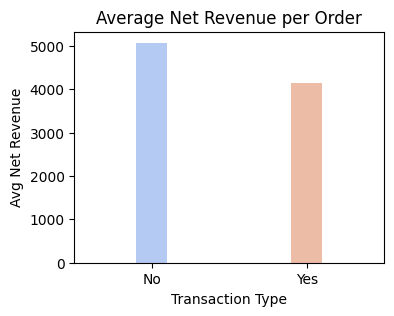

In [53]:
avg_rev = df.groupby("Discount Availed")["Net Amount"].mean().reset_index()
plt.figure(figsize = (4,3))
sns.barplot(data=avg_rev, x="Discount Availed", y="Net Amount",hue = "Discount Availed",width = 0.2,palette="coolwarm")
plt.title("Average Net Revenue per Order")
plt.ylabel("Avg Net Revenue")
plt.xlabel("Transaction Type")
plt.show()


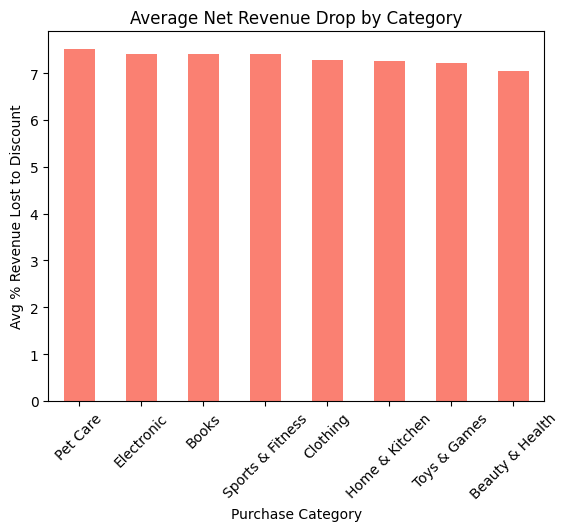

In [54]:
df["Revenue Drop %"] = (df["Discount Amount"] / df["Gross Amount"]) * 100
category_drop = df.groupby("Purchase Category")["Revenue Drop %"].mean().sort_values(ascending=False)

category_drop.plot(kind="bar", color="salmon")
plt.title("Average Net Revenue Drop by Category")
plt.ylabel("Avg % Revenue Lost to Discount")
plt.xticks(rotation=45)
plt.show()


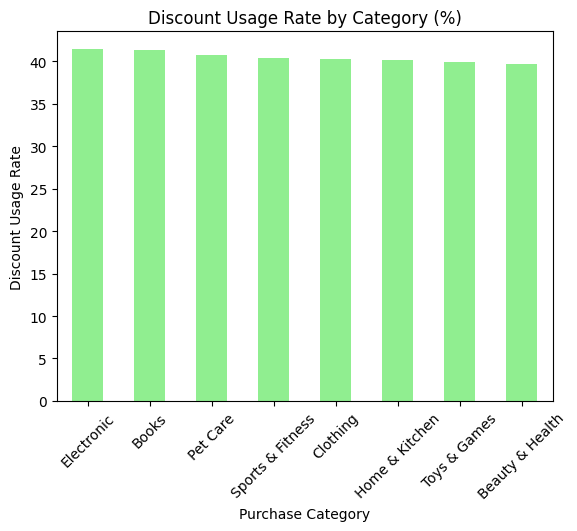

In [55]:
discount_counts = df[df["Discount Availed"] == "Yes"].groupby("Purchase Category")["TID"].count()
total_counts = df.groupby("Purchase Category")["TID"].count()

discount_rate = (discount_counts / total_counts * 100).sort_values(ascending=False)

discount_rate.plot(kind="bar", color="lightgreen")
plt.title("Discount Usage Rate by Category (%)")
plt.ylabel("Discount Usage Rate")
plt.xticks(rotation=45)
plt.show()


In [ ]:
gp = df.groupby()